<a href="https://colab.research.google.com/github/yudahendriawan/google-colab-projects/blob/natural-language-processing/submission_NLP_Yuda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
from google.colab import drive
drive.mount('/content/drive/')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import matplotlib.pyplot as plt

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [106]:
df = pd.read_csv('/content/drive/MyDrive/google-colab-datasets/ag_news_datasets_train.csv')
df.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [107]:
df.tail()

,Class Index,Title,Description
119995,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...
119996,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...
119997,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...
119998,2,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...
119999,2,Nets get Carter from Raptors,INDIANAPOLIS -- All-Star Vince Carter was trad...


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Class Index  120000 non-null  int64 
 1   Title        120000 non-null  object
 2   Description  120000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


In [109]:
df.drop(columns=['Title'], axis=1, inplace=True)
df.head()

,Class Index,Description
0,3,"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Reuters - Private investment firm Carlyle Grou...
2,3,Reuters - Soaring crude prices plus worries\ab...
3,3,Reuters - Authorities have halted oil export\f...
4,3,"AFP - Tearaway world oil prices, toppling reco..."


In [110]:
category = pd.get_dummies(df['Class Index'], dtype=np.float32)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='Class Index')
df_baru.head()

,Description,1,2,3,4
0,"Reuters - Short-sellers, Wall Street's dwindli...",0.0,0.0,1.0,0.0
1,Reuters - Private investment firm Carlyle Grou...,0.0,0.0,1.0,0.0
2,Reuters - Soaring crude prices plus worries\ab...,0.0,0.0,1.0,0.0
3,Reuters - Authorities have halted oil export\f...,0.0,0.0,1.0,0.0
4,"AFP - Tearaway world oil prices, toppling reco...",0.0,0.0,1.0,0.0


In [111]:
description = df_baru['Description'].values
label = df_baru[[1,2,3,4]].values
label

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [112]:
description_latih, description_test, label_latih, label_test = train_test_split(description, label, test_size=0.2)

In [113]:
tokenizer = Tokenizer(num_words=100000, oov_token='x')
tokenizer.fit_on_texts(description_latih)

sekuens_latih = tokenizer.texts_to_sequences(description_latih)
sekuens_test = tokenizer.texts_to_sequences(description_test)

padded_latih = pad_sequences(sekuens_latih)
padded_test = pad_sequences(sekuens_test)

In [114]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Embedding(input_dim=100000, output_dim=16),
        tf.keras.layers.LSTM(64),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(4, activation='softmax')
    ]
)

class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True

callbacks = MyCallback()

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [115]:
num_epochs = 10
history = model.fit(
    padded_latih,
    label_latih,
    epochs=num_epochs,
    validation_data=(padded_test, label_test),
    verbose=2,
    callbacks=[callbacks]
)

Epoch 1/10
3000/3000 - 53s - loss: 0.5036 - accuracy: 0.8129 - val_loss: 0.3298 - val_accuracy: 0.8959 - 53s/epoch - 18ms/step
Epoch 2/10
3000/3000 - 29s - loss: 0.2581 - accuracy: 0.9227 - val_loss: 0.3299 - val_accuracy: 0.8991 - 29s/epoch - 10ms/step
Epoch 3/10
3000/3000 - 31s - loss: 0.1910 - accuracy: 0.9413 - val_loss: 0.3467 - val_accuracy: 0.8939 - 31s/epoch - 10ms/step
Epoch 4/10

Akurasi telah mencapai >90%!
3000/3000 - 30s - loss: 0.1496 - accuracy: 0.9534 - val_loss: 0.3612 - val_accuracy: 0.9006 - 30s/epoch - 10ms/step


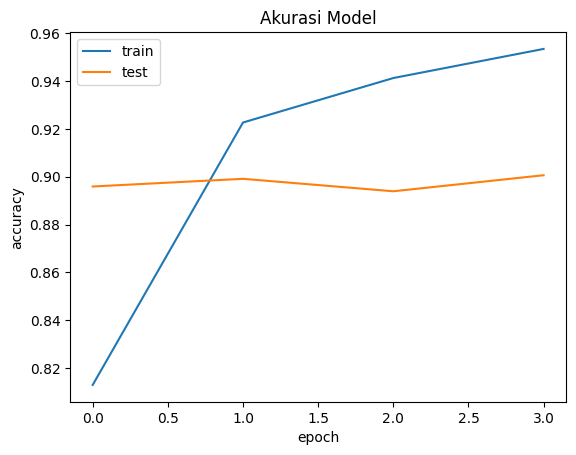

In [116]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

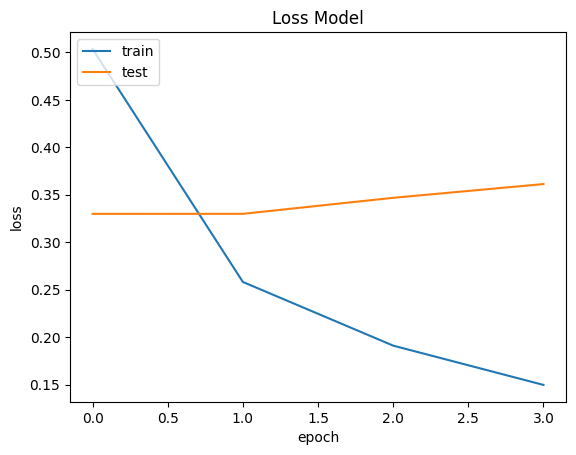

In [117]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()